# Contents
1. [Sentiment analysis tools](#1.-Sentiment-analysis-tools)           
    1.1. [Flair](#1.1-Flair)   
    1.2. [VADER](#1.2-VADER)                     
    1.3. [TextBlob](#1.3-TextBlob)  
2. [Sentiment analysis on the QuoteBank dataset](#2.-Sentiment-analysis-on-the-QuoteBank-dataset)          
    2.1. [Predict sentiment scores](#2.1.-Predict-sentiment-scores)  
    2.2. [Look at some examples](#2.2.-Look-at-some-examples)  
    2.3. [Compare VADER and TextBlob](#2.3.-Compare-VADER-and-TextBlob)
3. [Conclusion](#3.-Conclusion)  
    3.1. [Feasibility](#3.1.-Feasibility)
4. [References](#4.-References)

# **1. Sentiment analysis tools**

The goal of sentiment analysis is to associate an opinion to each quote belonging to a certain topic. To quantify the opinion of a quote, we use sentiment analysis, a tool in natural language processing that links a sentiment score to a text. The sentiment or *polarity score* is **a scalar between -1 and 1, where -1 reflects a strongly negative sentiment, 1 strongly positive and 0 a neutral opinion**. Here, we looked into three sentiment analysis tools.  

1. [Flair](https://github.com/flairNLP/flair): An long short-term memory (LSTM) model trained on movie reviews from the IMBD dataset. 

2. [VADER](https://github.com/cjhutto/vaderSentiment) [1]: a rule-based (bag of words) sentiment analysis tool developed at MIT specifically attuned to sentiments expressed in social media. It is part of the NLTK library. In brief, VADER links a sentiment score to each individual word in a sentence, and calculates the final sentiment score as the mean of each individual word in the sentence.  

3. [TextBlob](https://github.com/sloria/TextBlob): a general library for natural language processing with many tools including rule-based sentiment analysis.


In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install Flair, VADER and TextBlob
!pip install flair
!pip install vaderSentiment
!pip install -U textblob

!pip install -U IPython

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from scipy import stats

from flair.data import Sentence
from flair.models import TextClassifier
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
# Define three sentences: one neutral, one positive and one negative
sentence_neutral = 'The hottest temperature ever recorded on Earth was 2 billion degrees kelvin.'
sentence_positive = 'These fantastic sentiment analysis tools make me very happy.'
sentence_negative = 'What I do not like about november is the annoying rain.'
sentence_list = [sentence_neutral, sentence_positive, sentence_negative]

<a id='flair'></a>
## 1.1 Flair
Flair classifies a sentence into one of three categories: positive, negative and neutral, and gives the probability associated with the most likely cluster.

In [5]:
# load the sentiment classifier
classifier = TextClassifier.load('sentiment')

2021-11-12 13:15:34,995 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpji26he0p


100%|██████████| 265512723/265512723 [00:37<00:00, 7044632.13B/s]

2021-11-12 13:16:13,069 copying /tmp/tmpji26he0p to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-11-12 13:16:13,622 removing temp file /tmp/tmpji26he0p
2021-11-12 13:16:14,164 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [6]:
# Convert the strings into a Flair sentence and predict their sentiment 
for string in sentence_list:
  sentence = Sentence(string)
  classifier.predict(sentence)
  print('\n', sentence)


 Sentence: "The hottest temperature ever recorded on Earth was 2 billion degrees kelvin ."   [− Tokens: 13  − Sentence-Labels: {'label': [POSITIVE (0.5297)]}]

 Sentence: "These fantastic sentiment analysis tools make me very happy ."   [− Tokens: 10  − Sentence-Labels: {'label': [POSITIVE (0.9989)]}]

 Sentence: "What I do not like about november is the annoying rain ."   [− Tokens: 12  − Sentence-Labels: {'label': [POSITIVE (0.5119)]}]


The negative sentence 'What I do not like about november is the annoying rain.' is predicted positive (score=0.5119). This is not the only example Flair making mistakes: we have tried many more sentences, and saw quite a lot wrong predictions. Flair was trained on movie reviews and apparently does not generalize to broader language. Therefore, *we will not use Flair for our project* and turn to the rule-based tools VADER and TextBlob.

## 1.2 VADER

VADER (Valence Aware Dictionary for Sentiment Reasoning) is available under python's NLTK package. For each phrase it returns four scores:   
- positive $\in (0,1)$, the probability score for the sentence being positive.
- negative $\in (0,1)$, same as above but then for negative.
- neutral $\in (0,1)$, same for neutral.
- compound $\in (-1,1)$, is computed by normalizing the three scores above. -1 means likely negative, 1 means likely positive, and 0 is likely neutral.

In [7]:
# Create the VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Predict the VADER polarity of each sentence
for string in sentence_list:
  print('\n'+string)
  print(analyzer.polarity_scores(string))


The hottest temperature ever recorded on Earth was 2 billion degrees kelvin.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

These fantastic sentiment analysis tools make me very happy.
{'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compound': 0.8221}

What I do not like about november is the annoying rain.
{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.5873}


The VADER results make more sense than Flair. The negative sentence is predicted more neutral than negative, but still it has a negative compound score which indicates some degree of negativity. Furthermore, we note that the  compound score that VADER provides is convenient because it summarizes the sentiment of each statement in one number.

## 1.3 TextBlob

For each sentence, textblob returns 2 values:  
- polarity $\in$ [-1,1], where -1 is **negative**, 1 is **positive**, and 0 is **neutral**. This is comparable to VADER's compound score.
- subjectivity $\in$ [0,1], where 0 is **factual information** and 1 is a **subjective opinion**.

In [8]:
# Predict the TextBlob polarity scores of each sentence
for sentence in sentence_list:
  blob = TextBlob(sentence)
  print('\n'+sentence)
  print(blob.sentiment)


The hottest temperature ever recorded on Earth was 2 billion degrees kelvin.
Sentiment(polarity=0.0, subjectivity=0.0)

These fantastic sentiment analysis tools make me very happy.
Sentiment(polarity=0.7, subjectivity=0.95)

What I do not like about november is the annoying rain.
Sentiment(polarity=-0.8, subjectivity=0.9)


TextBlob also correctly classifies all three sentences, and it gives us extra information about the subjectivity in a sentence. Now, let's apply both VADER and TextBlob on our dataset.

# **2. Sentiment analysis on the QuoteBank dataset**

In [9]:
# Get a preprocessed sample of the dataset, filtered only for quotes of 
# US modern politicians (cfr Data_Wrangling.ipynb)
samplepath_processed = '/content/drive/MyDrive/ADA/Processed/quotes-2020-sample.parquet.gzip'
df = pd.read_parquet(samplepath_processed)
print('Loaded %d sample quotations.'%len(df))

Loaded 9099 sample quotations.


In [10]:
df.head()

,date,qids,quotation,speaker,urls,domains
0,2020-01-23 22:29:35,Q7687964,Correctional officers received higher pay over...,Tate Reeves,[https://yallpolitics.com/2020/01/23/governor-...,[yallpolitics.com]
1,2020-02-26 22:53:36,Q22686,Prime Minister Modi and President Trump commit...,President Donald Trump,[https://www.newkerala.com/news/2020/31253.htm],[newkerala.com]
2,2020-03-16 19:17:22,Q13562456,The forces of the status quo have been effecti...,Nina Turner,[http://p.washingtontimes.com/news/2020/mar/16...,"[p.washingtontimes.com, washingtontimes.com]"
3,2020-02-09 18:22:09,Q22686,The Trump administration has reversed almost a...,Donald Trump,[https://www.alternet.org/2020/02/white-house-...,[alternet.org]
4,2020-02-10 00:00:00,Q359442,You cannot take support to billionaires and th...,Bernie Sanders,[https://thiscantbehappening.net/the-red-baiti...,"[counterpunch.org, thiscantbehappening.net]"


## 2.1. Predict sentiment scores

In [11]:
def get_vader_compound_score(sentence):
  # Apply VADER analyzer and get compound score
  return analyzer.polarity_scores(sentence)['compound']

def get_textblob_sentiment(sentence):
  # Apply TextBlob analyzer and get poarity and subjectivity
  blob = TextBlob(sentence)
  return [blob.sentiment.polarity, blob.sentiment.subjectivity]

In [12]:
# Get VADER compound scores of quotations
start = time.time()
df['vader_compound_score'] = df.quotation.apply(get_vader_compound_score)
print('VADER: Predicted %d quotations in %.2f seconds.'%(len(df), time.time()-start))

VADER: Predicted 9099 quotations in 2.87 seconds.


In [13]:
# Get TextBlob polarity and subjectivity scores into different columns
start = time.time()
df[['textblob_polarity', 'textblob_subjectivity']] = pd.DataFrame(df.quotation.apply(get_textblob_sentiment).to_list(), columns=['textblob_polarity', 'textblob_subjectivity'])
print('TextBlob: Predicted %d quotations in %.2f seconds.'%(len(df), time.time()-start))

TextBlob: Predicted 9099 quotations in 2.62 seconds.


## 2.2. Look at some examples

First, let's look at some example of positive, negative and neutral quotes (of VADER and TextBlob).

In [14]:
def print_random_sentiment_examples(df, ids, score_name, num_examples=5):
  # Print some random examples of quotes with their score.
  # Inputs
  # --------
  # df (pandas dataframe) is the dataframe containing the quotations and scores.
  # ids (list) is the list of specific ids you want to take the examples from.
  # score_name (string) is the name of the score based on which you generated the IDs.
  # --------
  np.random.seed(1)
  random_indeces = np.random.randint(len(ids), size=num_examples)
  for index in random_indeces:
    id = ids[index]
    print('%.2f: %s'%(df.loc[id, score_name], df.loc[id,'quotation']))

In [15]:
# Some examples of Vader compound scores
print('VADER results:')
print('\nPositive quote examples:')
print_random_sentiment_examples(df, df[df.vader_compound_score > 0.9].index.to_list(), 'vader_compound_score')

print('\nNegative quote examples:')
print_random_sentiment_examples(df, df[df.vader_compound_score < -0.9].index.to_list(), 'vader_compound_score')

print('\nNeutral quote examples:')
print_random_sentiment_examples(df, df[(df.vader_compound_score > -0.1) & (df.vader_compound_score < 0.1)].index.to_list(), 'vader_compound_score')

VADER results:

Positive quote examples:
0.91: until we have passed significant and bold new steps above and beyond what the House has passed, to help our strong nation and our strong underlying economy weather this storm.
0.93: The question is, is this the best hot dog? Or is the best hot dog sold by all those gorgeous women at the last stand?
0.94: This couldn't be further from the truth. We work hard to support candidates hoping to become officers to help level the playing field, encouraging people from different backgrounds and under-represented groups. Ultimately, everyone is assessed equally on merit.
0.96: Everyone here today is united by a shared conviction. We know that our nation is stronger, our future is brighter, and our joy is greater when we turn to God and ask him to shed his grace on our lives,
0.96: We wish this patient a full recovery and we know he is being cared for by highly competent medical teams. My administration and the Department of Public Health are working

In [16]:
# Some examples of TextBlob polarity

print('TextBlob polarity results:')
print('\nPositive quote examples:')
print_random_sentiment_examples(df, df[df.textblob_polarity > 0.9].index.to_list(), 'textblob_polarity')

print('\nNegative quote examples:')
print_random_sentiment_examples(df, df[df.textblob_polarity < -0.9].index.to_list(), 'textblob_polarity')

print('\nNeutral quote examples:')
print_random_sentiment_examples(df, df[(df.textblob_polarity > -0.1) & (df.textblob_polarity < 0.1)].index.to_list(), 'textblob_polarity')

TextBlob polarity results:

Positive quote examples:
1.00: sent by God and is perfect
1.00: We have the biggest and best health and fitness festival in world, but we would never choose making money over people's health,
1.00: However it has been going on now for the best part of a decade and the matter does need to be settled once and for all.
1.00: I am declaring a State of Emergency in Nebraska as we continue to work to be the best prepared state in the nation for COVID-19,
1.00: running to be a president for everybody. I also believe that this country is at its best when we lift up everybody for who we are.

Negative quote examples:
-1.00: terrible week of suffering and deaths
-1.00: a radical anti-Trump person, and she didn't say that when she went up there. And she became the foreperson of the jury. And she did terrible things and said terrible things.
-1.00: He's been sued, the contractor that the county contracted with has been sued, there's sub suits going on, there's code enfo

In [17]:
# Some examples of TextBlob subjectivity

print('TextBlob subjectivity results:')
print('\nSubjective quote examples:')
print_random_sentiment_examples(df, df[df.textblob_subjectivity > 0.9].index.to_list(), 'textblob_subjectivity')

print('\nNon-subjective quote examples:')
print_random_sentiment_examples(df, df[df.textblob_subjectivity < 0.1].index.to_list(), 'textblob_subjectivity')

TextBlob subjectivity results:

Subjective quote examples:
1.00: terrible week of suffering and deaths
1.00: Fiscally, it is critically important for the school districts,
1.00: Needless to say, I think we know who this song is dedicated to,
0.95: I'm still surprised we don't have any confirmed cases in Northwest Arkansas,
0.91: With all the uncertainty we are dealing with, we felt strongly that it would be important for... all of Longhorn nation that we name an interim president as soon as possible,

Non-subjective quote examples:
0.00: We have the ability to reinstall punitive tariffs, with retaliatory ability on China's part,
0.00: We'll see how it goes, we still need a vote, don't we?
0.00: We need to build this reserve corps,
0.00: promise to the American people to enforce our nation's immigration laws.
0.00: People don't want to be informed, they want to seem informed.


Running these examples a couple of times gives an idea of the error rate of the models. **While the compound and polarity scores yield surprisingly good results, the TextBlob's subjectivity score is often inaccurate, making a wrong prediction roughly 30% of the times.**

## 2.3. Compare VADER and TextBlob
Now, let's look at the differences between VADER and TextBlob predictions.


In [18]:
df[['vader_compound_score','textblob_polarity','textblob_subjectivity']].describe()

,vader_compound_score,textblob_polarity,textblob_subjectivity
count,9099.000000,9099.000000,9099.000000
mean,0.118354,0.098594,0.368981
std,0.457355,0.255787,0.296650
min,-0.991900,-1.000000,0.000000
25%,-0.128000,0.000000,0.000000
50%,0.000000,0.000000,0.391667
75%,0.476700,0.233333,0.571429
max,0.994800,1.000000,1.000000


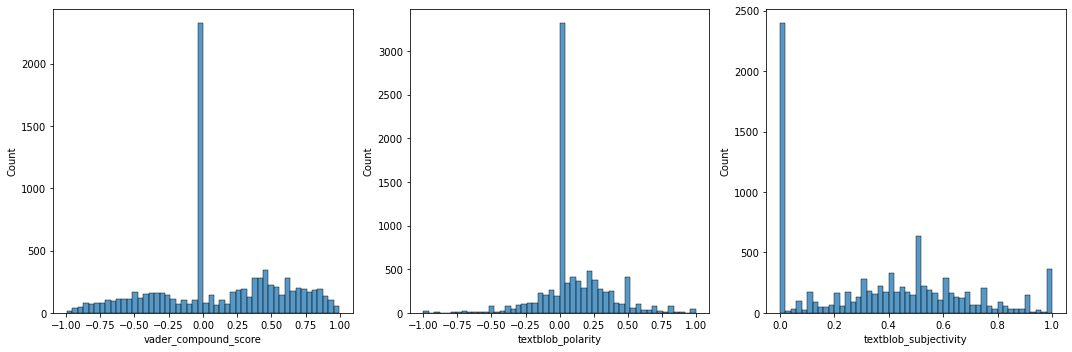

In [19]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df.vader_compound_score, bins=50, ax=ax[0])
sns.histplot(df.textblob_polarity, bins=50, ax=ax[1])
sns.histplot(df.textblob_subjectivity, bins=50, ax=ax[2])
fig.tight_layout()

**Figure 1: Distributions of VADER compound score (left), TextBlob polarity score (center), and TextBlob subjectivity score (right).**   
Interestingly, *the VADER compound scores are more polarized* (i.e. there are more quotes classified as extremely negative or extremely positive compared to the TextBlob predictions), which is also reflected by a higher standard deviation of VADER compared to TextBlob polarity score.  

Next, we test how similar a VADER compound score is to a TextBlob polarity score.


There is a moderate (0.43) and very significant (p=0.000000) correlation between the VADER compound score and the TextBlob polarity.



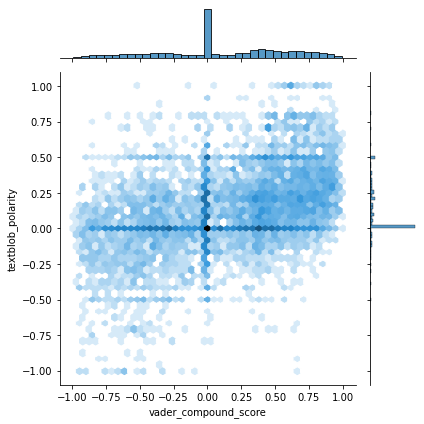

In [20]:
# Correlation between VADER and TextBlob polarity scores
[pearson_vader_textblob, p_vader_textblob] = stats.pearsonr(df['vader_compound_score'], df['textblob_polarity'])
print('\nThere is a moderate (%.2f) and very significant (p=%f) correlation between the VADER compound score and the TextBlob polarity.\n'%(pearson_vader_textblob, p_vader_textblob))
# Make jointplot
sns.jointplot(data = df, x = 'vader_compound_score', y = 'textblob_polarity', kind='hex', bins='log')
plt.tight_layout()

**Figure 2: TextBlob polarity score of each quote plotted against the VADER compound score.**  
The color of each hexagonal bin represents the number of datapoints in that bin. Note that the colors are represented in a log-scale.  

Luckily for us, because VADER and Textblob scores are correlated: quotes which are classified negative by VADER are more likely to also be classified negative by TextBlob. There is still quite some unexplained variance, however, which indicates that there also exists some disagreement between VADER and TextBlob polarity scores.  

Lastly, we are interested in the TextBlob subjectivity score, and want to know whether strongly positive or negative quotes are also likely to be subjective. Therefore, we correlate the *absolute value* of the TextBlob compound score with the subjectivity score.


There is a considerable (0.63) and very significant (p=0.000000) correlation between the TextBlob polarity score and the TextBlob subjectivity.

There is a small (0.28) but very significant (p=0.000000) correlation between the VADER compound score and the TextBlob subjectivity.



<Figure size 432x288 with 0 Axes>

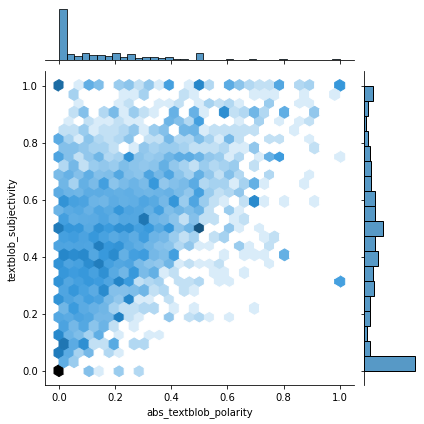

<Figure size 432x288 with 0 Axes>

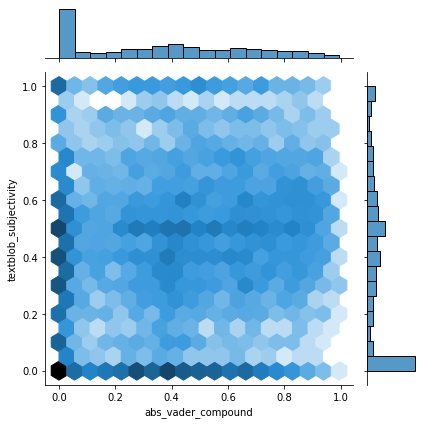

In [21]:
# Correlation between VADER and TextBlob polarity scores
df['abs_textblob_polarity'] = np.abs(df['textblob_polarity'])
df['abs_vader_compound'] = np.abs(df['vader_compound_score'])
[pearson_polarity_subjectivity, p_polarity_subjectivity] = stats.pearsonr(df['abs_textblob_polarity'],df['textblob_subjectivity'])
[pearson_compound_subjectivity, p_compound_subjectivity] = stats.pearsonr(df['abs_vader_compound'],df['textblob_subjectivity'])

print('\nThere is a considerable (%.2f) and very significant (p=%f) correlation between the TextBlob polarity score and the TextBlob subjectivity.\n'%(pearson_polarity_subjectivity, p_polarity_subjectivity))
print('There is a small (%.2f) but very significant (p=%f) correlation between the VADER compound score and the TextBlob subjectivity.\n'%(pearson_compound_subjectivity, p_compound_subjectivity))

# Make jointplots
plt.figure();
sns.jointplot(data = df, x = 'abs_textblob_polarity', y = 'textblob_subjectivity', kind='hex', bins='log')
plt.figure();
sns.jointplot(data = df, x = 'abs_vader_compound', y = 'textblob_subjectivity', kind='hex', bins='log')
plt.tight_layout()

**Figure 3: TextBlob's subjectivity versus the absolute value of polarity (top) and TextBlob's  subjectivity versus the absolute value of VADER's compound score (bottom).**  
The subjectivity score moderately correlate with TextBlob's polarity, but the correlation with the VADER compound score is small.

# **3. Conclusion**
Here, we tested three sentiment analysis tools: Flair, VADER and TextBlob. 

- Flair did not generalize well to simple examples of negative text, and therefore we excluded it.
- VADER and TextBlob are both fast (**predict time is roughly 3 seconds for 9099 quotations**) and seem to have similar performance. For roughly 30% of the examples, TextBlob's subjectivity score is not accurate.  

Since VADER and TextBlob have similar performance, for our project **we choose the tool that is currently most popular for sentiment analysis:&#160;VADER** (see [here](https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/) for a comparison between VADER and TextBlob on crowdsourcing data, which concludes that VADER outperforms TextBlob, and [here](https://medium.com/backyard-programmers/sentiment-analysis-of-stock-news-using-vader-5ba554d7cc19) for an example where VADER was applied to sentiment analysis of news articles).


## 3.1 Feasibility

To evaluate the feasibility of our chosen tool, VADER, we will test again the time it takes to evaluate the sentiment on our sample dataset to get a better idea of its performances.

In [22]:
%%timeit -n 5
df.quotation.apply(get_vader_compound_score)

2.84 s ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


On average, the sentiment evaluation takes a bit less than 3s for 9099 quotes. After preprocessing, our filtered dataset will be composed of around 12 milion entries, accounting for all years in the timespan 2015-2020. Scaling linearly, thus, we expect the Sentiment Analysis to take a little more than 1 hour in total. 
In practice, despite this is already a perfectly feasible time, we will probably need much less rows, because we want to construct opinions and place on our compass only politicians with a certain minimum number of quotes.

# **4. References**
[1] Hutto, C., & Gilbert, E. (2014). *VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text.* Proceedings of the International AAAI Conference on Web and Social Media, 8(1), 216–225.  